In [4]:
#!unzip '/content/drive/MyDrive/dog_vision/dog-breed-identification.zip' -d  '/content/drive/MyDrive/dog_vision'

In [5]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [6]:
import tensorflow_hub as hub

In [7]:
print('avaialble ' if tf.config.list_physical_devices('GPU') else 'no')

avaialble 


In [8]:
import pandas as pd
labels_csv=pd.read_csv('/content/drive/MyDrive/dog_vision/labels.csv')
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     dfdb153c5100737c782c5f9578717594  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [9]:
labels_csv['breed'].value_counts()

scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
brabancon_griffon        67
golden_retriever         67
komondor                 67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

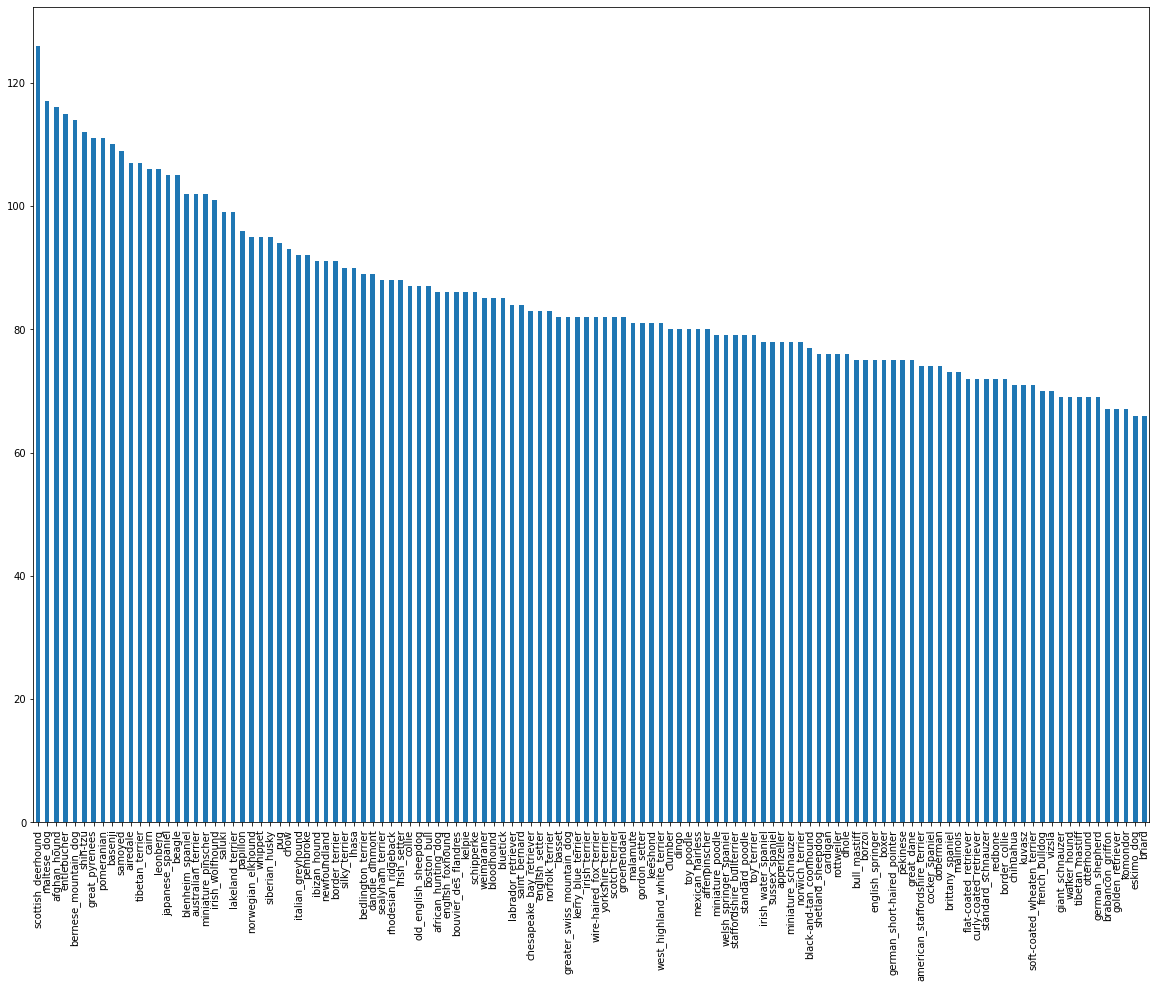

In [10]:

labels_csv['breed'].value_counts().plot.bar(figsize=(20,15))

In [11]:
labels_csv['breed'].value_counts().mean()

85.18333333333334

In [12]:
labels_csv['breed'].value_counts().median()

82.0

In [13]:
from IPython.display import Image

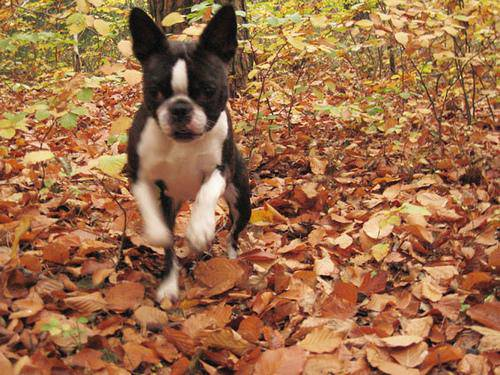

In [14]:
Image('/content/drive/MyDrive/dog_vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg')

In [15]:
filenames=['drive/MyDrive/dog_vision/train/'+ fname + '.jpg' for fname in labels_csv['id']]
filenames

['drive/MyDrive/dog_vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/dog_vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/dog_vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/dog_vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/dog_vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/dog_vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/dog_vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/dog_vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/dog_vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/dog_vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg',
 'drive/MyDrive/dog_vision/train/004396df1acd0f1247b740ca2b14616e.jpg',
 'drive/MyDrive/dog_vision/train/0067dc3eab0b3c3ef0439477624d85d6.jpg',
 'drive/MyDrive/dog_vision/train/00693b8bc2470375cc744a6391d397ec.jpg',
 'drive/MyDrive/dog_vision/train/006cc3ddb9dc1bd827479569fcdc52d

In [16]:
import os

In [17]:
if len(os.listdir('/content/drive/MyDrive/dog_vision/train'))==len(filenames):
  print('proceed')
else:
  print('boom')

proceed


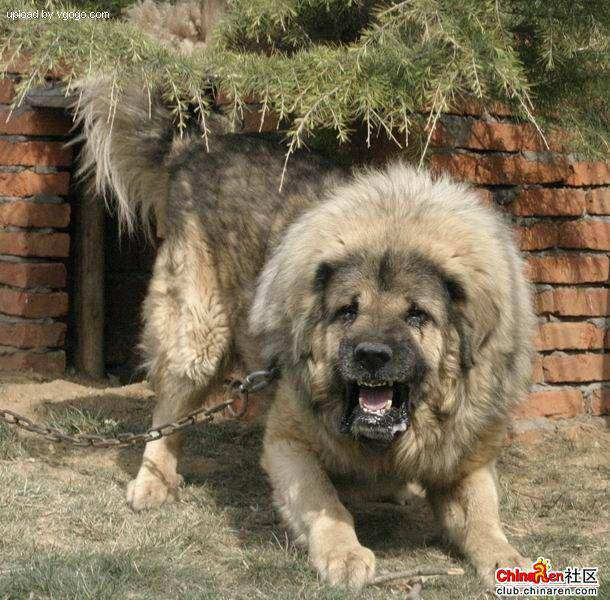

In [18]:
Image(filenames[9000])

In [19]:
labels_csv['breed'][9000]

'tibetan_mastiff'

In [20]:
labels=labels_csv['breed']
labels

0                     boston_bull
1                           dingo
2                        pekinese
3                        bluetick
4                golden_retriever
                   ...           
10217                      borzoi
10218              dandie_dinmont
10219                    airedale
10220          miniature_pinscher
10221    chesapeake_bay_retriever
Name: breed, Length: 10222, dtype: object

In [21]:
import numpy as np
labels=np.array(labels)

In [22]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [23]:
len(labels)==len(filenames)

True

In [24]:
unique_breeds=np.unique(labels)

In [25]:
len(np.unique(labels))

120

In [26]:
print(labels[0])

boston_bull


In [27]:
print(labels[0]==unique_breeds)

[False False False False False False False False False False False False
 False False False False False False False  True False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False]


In [28]:
boolean_labels=[label==unique_breeds for label in labels]

In [29]:
boolean_labels[:3]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [30]:
print(labels[0])

boston_bull


In [31]:
print(np.where(unique_breeds==labels[0]))

(array([19]),)


In [32]:
print(boolean_labels[0].argmax())

19


In [33]:
print(boolean_labels[0].astype(int))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


In [34]:
filenames[:10]

['drive/MyDrive/dog_vision/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/MyDrive/dog_vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/MyDrive/dog_vision/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/MyDrive/dog_vision/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/MyDrive/dog_vision/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/MyDrive/dog_vision/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/MyDrive/dog_vision/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/MyDrive/dog_vision/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/MyDrive/dog_vision/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/MyDrive/dog_vision/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [35]:
x=filenames
y=boolean_labels

In [36]:
NUM_IMAGES= 1000 #@param {type:"slider",min:1000,max:10000,step:1000}

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(x[:NUM_IMAGES],y[:NUM_IMAGES],test_size=0.2,random_state=42)


In [38]:
from matplotlib.pyplot import imread
image=imread(filenames[42])
image.shape

(257, 350, 3)

In [39]:
image

array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  53],
        [ 97,  88,  49],
        [120, 111,  72]]

In [40]:
tf.constant(image)

<tf.Tensor: shape=(257, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]],

       [[ 56, 104,  66],
        [ 58, 106,  66],
        [ 64, 112,  72],
        ...,
        [ 71, 127,  82],
        [ 73, 129,  84],
        [ 73, 130,  85]],

       ...,

       [[  2,  11,  10],
        [  5,  14,  13],
        [  6,  15,  14],
        ...,
        [120, 113,  67],
        [126, 118,  72],
        [122, 114,  67]],

       [[  0,   4,   6],
        [  0,   9,   8],
        [  1,  10,   9],
        ...,
        [105,  98,  52],
        [111, 104,  58],
        [111, 103,  56]],

       [[ 18,  16,  37],
        [ 18,  18,  28],
        [ 17,  20,  11],
        ...,
        [101,  92,  5

In [41]:
IMG_SIZE=224

def process_image(image_path,img_size=IMG_SIZE):
  image=tf.io.read_file(image_path)
  image=tf.image.decode_jpeg(image,channels=3)
  image=tf.image.convert_image_dtype(image,tf.float32)
  image=tf.image.resize(image,size=[img_size,img_size])
  
  return image

In [42]:
def get_image_label(image_path,label):

  image=process_image(image_path)
  return image,label

In [43]:
BATCH_SIZE=32
def create_data_batches(x,y=None,batch_size=BATCH_SIZE,test_data=False,valid_data=False):
  if test_data:
    print('creating test data batches')
    data=tf.data.Dataset.from_tensor_slices(tf.constant(x))
    data_batch=data.map(process_image).batch(batch_size)
    return data_batch

  elif valid_data:
    print('creating valid data batches')
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data_batch=data.map(get_image_label).batch(batch_size)
    return data_batch
  else:
    print('creatig training batches')
    data=tf.data.Dataset.from_tensor_slices((tf.constant(x),tf.constant(y)))
    data=data.shuffle(buffer_size=len(x))
    data_batch=data.map(get_image_label).batch(batch_size)
    return data_batch






In [44]:
train_data=create_data_batches(X_train,y_train)
valid_data=create_data_batches(X_val,y_val,valid_data=True)


creatig training batches
creating valid data batches


In [45]:
train_data.element_spec,valid_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [46]:
import matplotlib.pyplot as plt
def show_25_images(images,labels):
  plt.figure(figsize=(10,10))
  for i in range(25):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[labels[i].argmax()])
    plt.axis('off')
  


In [47]:
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [48]:
train_images,train_labels=next(train_data.as_numpy_iterator())

In [49]:
train_images,train_labels

(array([[[[0.38123253, 0.522409  , 0.13809524],
          [0.501361  , 0.6425375 , 0.25822377],
          [0.7711242 , 0.91230065, 0.5279869 ],
          ...,
          [0.56208795, 0.6877936 , 0.39348567],
          [0.5476576 , 0.69241637, 0.3906899 ],
          [0.60010505, 0.7412815 , 0.4587185 ]],
 
         [[0.42846644, 0.5696429 , 0.18532915],
          [0.52177995, 0.6629564 , 0.27864265],
          [0.6883235 , 0.8295    , 0.44518626],
          ...,
          [0.6192489 , 0.74451506, 0.44584915],
          [0.62757474, 0.7609628 , 0.4626567 ],
          [0.5991947 , 0.7406863 , 0.44954485]],
 
         [[0.6385155 , 0.779692  , 0.3953782 ],
          [0.6810856 , 0.8222621 , 0.43794835],
          [0.69009763, 0.83127415, 0.4469604 ],
          ...,
          [0.6558029 , 0.7774971 , 0.4706081 ],
          [0.620294  , 0.7531739 , 0.45016968],
          [0.53511906, 0.67864144, 0.3766807 ]],
 
         ...,
 
         [[0.3233894 , 0.42874658, 0.12836137],
          [0.42943

In [50]:
len(train_images)

32

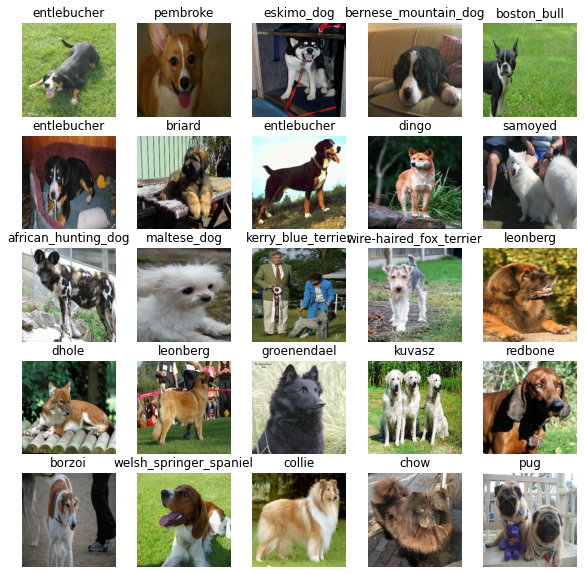

In [51]:
show_25_images(train_images,train_labels)

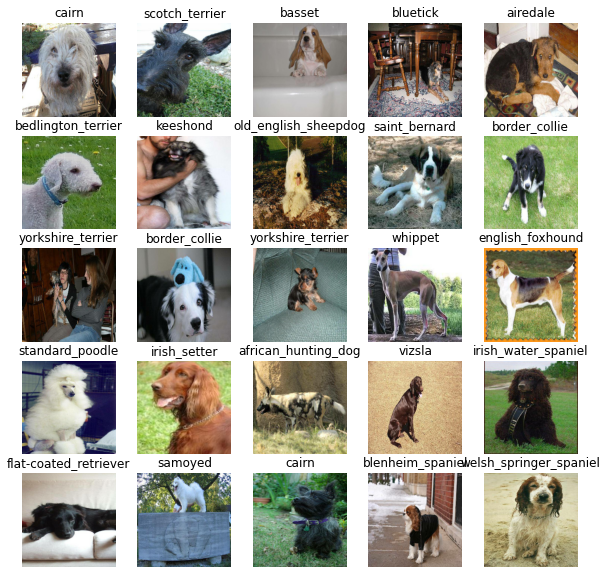

In [52]:
val_images,val_labels=next(valid_data.as_numpy_iterator())
show_25_images(val_images,val_labels)

In [53]:
INPUT_SHAPE=[None,IMG_SIZE,IMG_SIZE,3]

OUTPUT_SHAPE=len(unique_breeds)

MODEL_URL='https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5'

In [54]:
def create_model(input_shape=INPUT_SHAPE,output_shape=OUTPUT_SHAPE,model_url=MODEL_URL):
  print('building model with',model_url)
  model=tf.keras.Sequential([
                             hub.KerasLayer(model_url),
        tf.keras.layers.Dense(units=OUTPUT_SHAPE,
                              activation='softmax')
  ])

  model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
  
  model.build(input_shape)
  return model

In [55]:
model=create_model()
model.summary()

building model with https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/5
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1001)              5432713   
_________________________________________________________________
dense (Dense)                (None, 120)               120240    
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


In [56]:
%load_ext tensorboard

In [57]:
import datetime

In [58]:
def create_tensorboard_callback():
  logdir=os.path.join('/content/drive/MyDrive/dog_vision/logs',datetime.datetime.now().strftime('%Y%M%D-%H%M%S'))
  return tf.keras.callbacks.TensorBoard(logdir)


In [59]:
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=3)

In [60]:
NUM_EPOCHS= 100 #@param {type:'slider',min:10,max:100,step:10}

In [61]:
def train_model():
  model=create_model()

  tensorboard=create_tensorboard_callback()

  model.fit(x=train_data,
            epochs=NUM_EPOCHS,
            validation_data=valid_data,
            validation_freq=1,
            callbacks=[tensorboard,early_stopping])
  
  return model


In [62]:
#model=train_model()

In [63]:
#%tensorboard --logdir drive/MyDrive/dog_vision/logs

In [64]:
#predictions=model.predict(valid_data,verbose=1)

In [65]:
#predictions

In [66]:
#predictions[0]

In [67]:
index=42
print(np.max(predictions[index]))
print(np.sum(predictions[index]))
print(np.argmax(predictions[index]))
print(unique_breeds[np.argmax(predictions[index])])

NameError: ignored

In [68]:
def get_pred_label(prediction_probabilities):
   return unique_breeds[np.argmax(prediction_probabilities)]

prediction=get_pred_label(predictions[81])

NameError: ignored

In [ ]:
prediction

In [ ]:
valid_data

In [69]:
def unbatchify(data):
  images=[]
  labels=[]
  for image,label in data.unbatch().as_numpy_iterator():
    images.append(image)
    labels.append(unique_breeds[np.argmax(label)])

  return images,labels





In [ ]:
val_images,val_labels=unbatchify(valid_data)
val_images[0],val_labels[0]

In [70]:
def plot_pred(prediction_probabilities,labels,images,n=1):
  pred_prob,true_label,image=prediction_probabilities[n],labels[n],images[n]
  
  pred_label=get_pred_label(pred_prob)

  plt.imshow(image)
 # plt.xticks=[]
  #plt.yticks=[]

  if pred_label==true_label:
    color='green'
  else:
    color='red'
 
  plt.title('{},{:.20f}%{}'.format(pred_label,np.max(pred_prob)*100,true_label),color=color)





In [ ]:
 plot_pred(prediction_probabilities=predictions,labels=val_labels,images=val_images,n=42)



In [71]:
def plot_pred_conf(prediction_probabilities,labels,n=1):
  pred_prob,true_label=prediction_probabilities[n],labels[n]

  pred_label=get_pred_label(pred_prob)
  top_10_pred_indexes=pred_prob.argsort()[-10:][::-1]
  top_10_pred_values=pred_prob[top_10_pred_indexes]
  top_10_pred_labels=unique_breeds[top_10_pred_indexes]
  
  top_plot=plt.bar(np.arange(len(top_10_pred_labels)),top_10_pred_values,
                   color='grey')
  
  if np.isin(true_label,top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels==true_label)].set_color('green')
  else:
    pass
  

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,labels=val_labels,n=42)

In [ ]:
print(type(val_labels))

In [ ]:
i_multiplier=0
num_rows=3
num_cols=2
num_images=num_rows * num_cols
plt.figure(figsize=(10*num_cols,5*num_rows))

for i in range(num_images):
   plt.subplot(num_rows,2*num_cols,2*i+1)
   plot_pred(prediction_probabilities=predictions,
             labels=val_labels,
             images=val_images,
             n=i+i_multiplier)
   plt.subplot(num_rows,2*num_cols,2*i+2)
   plot_pred_conf(prediction_probabilities=predictions,
                  labels=val_labels,
                  n=i+i_multiplier)
   plt.tight_layout(h_pad=1.0)
plt.show()


In [72]:
def save_model(model,suffix=None):
  model_dir=os.path.join('/content/drive/MyDrive/dog_vision/models',datetime.datetime.now().strftime('%Y%m%d-%H%M%S'))
  model_path=model_dir +'-'+ suffix+'.h5'
  print(f'saving model to ....{model_path}')
  model.save(model_path)
  return model_path


In [73]:
def load_model(model_path):
  print(f'loading model from ...{model_path}')
  model=tf.keras.models.load_model(model_path,custom_objects={'KerasLayer':hub.KerasLayer})
  return model

In [ ]:
#save_model(model,suffix='1000-images-mobilenetv2-Adam')

In [ ]:
#loaded_1000_image_model=load_model('/content/drive/MyDrive/dog_vision/models/20210421-213556-1000-images-mobilenetv2-Adam.h5')

In [ ]:
model.evaluate(valid_data)

In [ ]:
loaded_1000_image_model.evaluate(valid_data)

In [ ]:
len(x),len(y)

In [ ]:
full_data=create_data_batches(x,y)

In [ ]:
full_data

In [ ]:
full_model=create_model()

In [ ]:
full_model_tensorboard=create_tensorboard_callback()

In [ ]:
full_model_early_stopping=tf.keras.callbacks.EarlyStopping(monitor='accuracy',
                                                           patience=3)

In [ ]:
#full_model.fit(x=full_data,
               epochs=NUM_EPOCHS,
               callbacks=[full_model_tensorboard,full_model_early_stopping])

In [ ]:
#save_model(full_model,suffix='full-image-set-mobilenetv2-Adam')

In [74]:

test_path='drive/MyDrive/dog_vision/test/'
test_filenames=[test_path + fname  for fname in os.listdir(test_path)]
test_filenames

['drive/MyDrive/dog_vision/test/e4235f4b313a4b49946938992dd95249.jpg',
 'drive/MyDrive/dog_vision/test/e12168553b1e0b5e56d5ab6ac8a58984.jpg',
 'drive/MyDrive/dog_vision/test/de327414ced20d4e6f786a68bff82e10.jpg',
 'drive/MyDrive/dog_vision/test/e47de0441a48f2eff7c2faacd350ed06.jpg',
 'drive/MyDrive/dog_vision/test/e26d745f820e6b14cae26bb5def0648f.jpg',
 'drive/MyDrive/dog_vision/test/dcfd3463e1d23d51b309b0385292870b.jpg',
 'drive/MyDrive/dog_vision/test/e09f4ff3f7acee994812650a2fc7edef.jpg',
 'drive/MyDrive/dog_vision/test/e1f7ec4bd372612f53411026aaabf233.jpg',
 'drive/MyDrive/dog_vision/test/e1e79b3edfb3579e46ad914bf755dbbc.jpg',
 'drive/MyDrive/dog_vision/test/e008da6b957c62e7bcf6eb2ba4c2abd9.jpg',
 'drive/MyDrive/dog_vision/test/e381c5fcf1420985b20117e4bc7d38cd.jpg',
 'drive/MyDrive/dog_vision/test/f266f217791f0ec584047370775bf0ea.jpg',
 'drive/MyDrive/dog_vision/test/ef510b25dc13743d566b719b41b35e92.jpg',
 'drive/MyDrive/dog_vision/test/eb9d126d7a3adc19f25e4c9ba79aa6ce.jpg',
 'driv

In [75]:
test_data=create_data_batches(test_filenames,test_data=True)

creating test data batches


In [76]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [77]:
load_full_model=load_model('/content/drive/MyDrive/dog_vision/models/20210422-094127-full-image-set-mobilenetv2-Adam.h5')

loading model from .../content/drive/MyDrive/dog_vision/models/20210422-094127-full-image-set-mobilenetv2-Adam.h5


In [78]:
#test_predictions=load_full_model.predict(test_data,verbose=1)

324/324 [==============================] - 4813s 15s/step


In [80]:
np.savetxt('/content/drive/MyDrive/dog_vision/preds_array.csv',test_predictions,delimiter=',')

In [81]:
test_predictions=np.loadtxt('/content/drive/MyDrive/dog_vision/preds_array.csv',delimiter=',')

In [82]:
test_predictions[:10]

array([[2.56457633e-10, 1.06456484e-11, 1.66537689e-14, ...,
        1.14105421e-13, 2.02750927e-10, 4.29929981e-10],
       [1.17859180e-08, 4.01433019e-11, 6.83199261e-11, ...,
        4.80530268e-11, 4.87013085e-06, 2.01514786e-06],
       [4.44188288e-07, 6.27581709e-10, 5.07811837e-09, ...,
        1.72299337e-06, 6.35735167e-04, 1.08631724e-07],
       ...,
       [5.79939846e-11, 3.90835531e-10, 5.08547674e-12, ...,
        2.62105035e-13, 9.90923142e-12, 1.22829291e-13],
       [3.54011598e-09, 1.49528420e-13, 5.73569956e-08, ...,
        9.49969325e-10, 6.39687698e-08, 2.49611321e-06],
       [4.92604393e-08, 3.29140354e-10, 6.35617354e-08, ...,
        3.69286312e-07, 7.06001229e-05, 1.90542710e-06]])

In [83]:
preds_df=pd.DataFrame(columns=['id'] + list(unique_breeds))

In [84]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [86]:
test_ids=[os.path.splitext(path)[0] for path in os.listdir(test_path)]

In [87]:
preds_df['id']=test_ids

In [88]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e4235f4b313a4b49946938992dd95249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,e12168553b1e0b5e56d5ab6ac8a58984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,de327414ced20d4e6f786a68bff82e10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,e47de0441a48f2eff7c2faacd350ed06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e26d745f820e6b14cae26bb5def0648f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
preds_df[list(unique_breeds)]=test_predictions

In [90]:
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,e4235f4b313a4b49946938992dd95249,2.56458e-10,1.06456e-11,1.66538e-14,5.77461e-14,1.44555e-12,6.56932e-12,1.84583e-14,1.99805e-12,9.99209e-14,3.61361e-10,1.40788e-14,1.1795e-11,1.95908e-12,5.46862e-10,2.97748e-14,1.93319e-12,1.55367e-12,4.53479e-14,7.13637e-11,6.06159e-13,1.63767e-13,4.48311e-11,5.08245e-11,1.58291e-13,1.5207e-12,4.18406e-12,9.84865e-14,1.93621e-16,2.622e-16,9.53734e-10,2.50392e-13,1.35423e-11,7.71197e-11,2.84978e-10,1.29729e-14,1.38022e-16,5.03671e-12,2.26934e-13,7.31483e-14,...,1.46519e-15,9.58716e-15,1.4033e-14,3.01901e-12,2.3882e-07,3.11116e-07,8.22739e-12,1.239e-09,4.12599e-13,2.65366e-15,7.37131e-13,4.7596e-13,7.07918e-12,3.20422e-11,3.30021e-12,3.04542e-13,2.25454e-14,4.39288e-14,2.6329e-10,7.07438e-10,6.5138e-08,1.26447e-10,9.76721e-11,5.42042e-14,4.40326e-14,1.00819e-12,7.18584e-14,1.95562e-11,8.6991e-13,4.43591e-11,4.54288e-12,5.85398e-12,1.19737e-12,7.97055e-14,8.37764e-13,2.09255e-12,3.01771e-13,1.14105e-13,2.02751e-10,4.2993e-10
1,e12168553b1e0b5e56d5ab6ac8a58984,1.17859e-08,4.01433e-11,6.83199e-11,3.46401e-08,1.20023e-05,2.22133e-09,5.22561e-10,1.82337e-09,2.63425e-08,4.34753e-06,4.74292e-07,4.92684e-11,1.09112e-07,2.33646e-10,2.46246e-09,4.75701e-06,2.68906e-08,6.23853e-08,3.85326e-11,3.18031e-06,1.87941e-07,3.64957e-07,4.49616e-11,6.91427e-11,1.05557e-06,3.50385e-08,7.48372e-11,4.46684e-12,0.0243466,2.7602e-05,2.26564e-09,4.18313e-09,6.85173e-10,2.83043e-07,0.000142562,1.88917e-10,3.2146e-09,6.28373e-08,1.33744e-07,...,4.45454e-08,5.29884e-10,2.45249e-08,7.392e-10,1.27736e-09,3.8167e-10,9.33259e-12,1.41029e-07,9.7181e-09,3.38188e-07,4.04075e-08,3.6131e-09,3.5364e-11,6.83744e-11,2.51225e-09,1.54688e-06,5.53884e-12,1.82943e-07,7.64519e-10,2.174e-11,9.91031e-08,7.91687e-09,8.81124e-08,8.89833e-09,0.0100835,0.000208667,1.35158e-09,4.01207e-06,9.81453e-10,1.71478e-09,2.44427e-06,3.84086e-08,0.000145917,3.58782e-07,8.24455e-05,4.91407e-10,2.63587e-10,4.8053e-11,4.87013e-06,2.01515e-06
2,de327414ced20d4e6f786a68bff82e10,4.44188e-07,6.27582e-10,5.07812e-09,3.29026e-08,0.00138339,1.2172e-07,5.26726e-08,5.71093e-06,3.18611e-07,5.87298e-06,1.11437e-09,3.53182e-07,1.39108e-08,8.65834e-10,8.64869e-09,1.72163e-08,4.77925e-07,4.13985e-08,8.99394e-08,0.996296,2.28725e-09,6.15175e-06,1.44558e-07,6.40713e-10,3.04326e-08,1.44251e-06,4.43541e-08,1.33241e-06,3.05408e-08,3.33444e-06,1.38407e-07,3.57211e-07,9.29385e-07,4.61052e-07,6.35545e-08,5.3139e-08,2.49692e-08,2.0667e-08,6.77495e-07,...,1.89081e-07,6.24341e-08,3.19639e-07,3.09704e-10,1.09145e-08,4.32904e-07,1.87938e-07,1.24161e-07,1.97361e-05,1.73538e-07,2.51149e-09,8.55371e-08,4.96491e-07,3.7938e-11,3.155e-08,2.06108e-08,6.66232e-07,1.9907e-08,1.70296e-08,2.01066e-06,0.000100984,1.35322e-06,6.92617e-08,1.77109e-09,0.000420444,1.81901e-08,3.30128e-09,1.80374e-06,1.14784e-09,3.38639e-09,9.34864e-07,0.00022219,6.15625e-07,2.46399e-06,2.37441e-09,2.09771e-08,8.86137e-05,1.7229

In [91]:
preds_df.to_csv('/content/drive/MyDrive/dog_vision/full_model_predictions_submissions_1.csv',index=False)